## Power consumption (5GHz tone)

In [1]:
import pynq
from pynq.overlays.base import BaseOverlay
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

base = BaseOverlay('base.bit')
base.init_rf_clks() # Initialize clocks

In [2]:
rails = pynq.get_rails() # Get rails to monitor 
rails.keys() # Display rails key name

dict_keys(['VCCpSYZYGY_VIO', 'VDAC_AVCCAUX', 'VADC_AVCC', 'VCCp1V8', 'VCCp0V85', 'VDAC_AVTT', 'VADC_AVCCAUX', 'VDAC_AVCC', 'VCCp3V3'])

In [3]:
# Define function to transmit
def set_transmitter_channel(channel, enable, gain, frequency):
    channel.control.enable = enable
    channel.control.gain = gain
    channel.dac_block.MixerSettings['Freq'] = frequency

## All channels enable, no power-down feature ##
---

## Power measurement channel 0 and 1:

In [4]:
power_list = []

for i in np.linspace(0,10,11)/10:
    set_transmitter_channel(base.radio.transmitter.channel[0], True, i, 5000) #MHz
    set_transmitter_channel(base.radio.transmitter.channel[1], True, i, 5000) #MHz
    time.sleep(3)
    power = {'Gain':i, 
           'VCCpSYZYGY_VIO': rails['VCCpSYZYGY_VIO'].power.value,
           'VDAC_AVCCAUX': rails['VDAC_AVCCAUX'].power.value,
           'VADC_AVCC': rails['VADC_AVCC'].power.value, 
           'VCCp1V8': rails['VCCp1V8'].power.value, 
           'VCCp0V85': rails['VCCp0V85'].power.value, 
           'VDAC_AVTT': rails['VDAC_AVTT'].power.value, 
           'VADC_AVCCAUX': rails['VADC_AVCCAUX'].power.value, 
           'VDAC_AVCC': rails['VDAC_AVCC'].power.value, 
           'VCCp3V3': rails['VCCp3V3'].power.value }
    power_list.append(power)
    

In [5]:
x=[d['Gain'] for d in power_list]
y_axes = [
    {'name':'VCCpSYZYGY_VIO', 'values': [d['VCCpSYZYGY_VIO'] for d in power_list] },
    {'name':'VDAC_AVCCAUX', 'values': [d['VDAC_AVCCAUX'] for d in power_list] },
    {'name': 'VADC_AVCC', 'values':[d['VADC_AVCC'] for d in power_list]},
    {'name': 'VCCp1V8', 'values':[d['VCCp1V8'] for d in power_list]},
    {'name': 'VCCp0V85', 'values':[d['VCCp0V85'] for d in power_list]},
    {'name': 'VDAC_AVTT', 'values':[d['VDAC_AVTT'] for d in power_list]},
    {'name': 'VADC_AVCCAUX', 'values':[d['VADC_AVCCAUX'] for d in power_list]},
    {'name': 'VDAC_AVCC', 'values':[d['VDAC_AVCC'] for d in power_list]},
    {'name': 'VCCp3V3', 'values':[d['VCCp3V3'] for d in power_list]}
]

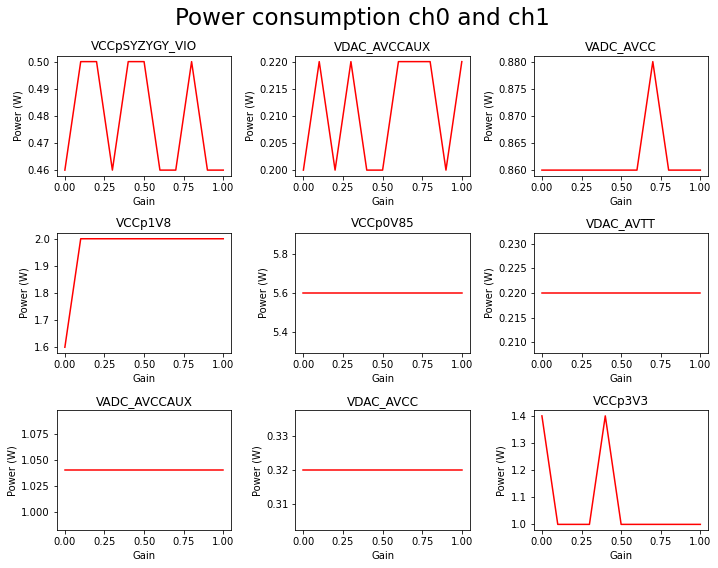

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(10,8))
fig.suptitle('Power consumption ch0 and ch1',fontsize=23)
for i in range(0,len(y_axes),1):
    ax[int(i/3),i-int(i/3)*3].plot(x, y_axes[i]['values'], 'r')
    ax[int(i/3),i-int(i/3)*3].set_xlabel('Gain')
    ax[int(i/3),i-int(i/3)*3].set_ylabel('Power (W)')
    ax[int(i/3),i-int(i/3)*3].set_title(y_axes[i]['name'])
plt.tight_layout()
fig.savefig("power_CH0_CH1.png")

## Power measurement channel 0:

In [7]:
power_list = []
set_transmitter_channel(base.radio.transmitter.channel[1], False, 0, 1) # Deactivate channel 1

for i in np.linspace(0,10,11)/10:
    set_transmitter_channel(base.radio.transmitter.channel[0], True, i, 5000) # MHz
    time.sleep(3)
    power = {'Gain':i, 
           'VCCpSYZYGY_VIO': rails['VCCpSYZYGY_VIO'].power.value,
           'VDAC_AVCCAUX': rails['VDAC_AVCCAUX'].power.value,
           'VADC_AVCC': rails['VADC_AVCC'].power.value, 
           'VCCp1V8': rails['VCCp1V8'].power.value, 
           'VCCp0V85': rails['VCCp0V85'].power.value, 
           'VDAC_AVTT': rails['VDAC_AVTT'].power.value, 
           'VADC_AVCCAUX': rails['VADC_AVCCAUX'].power.value, 
           'VDAC_AVCC': rails['VDAC_AVCC'].power.value, 
           'VCCp3V3': rails['VCCp3V3'].power.value }
    power_list.append(power)

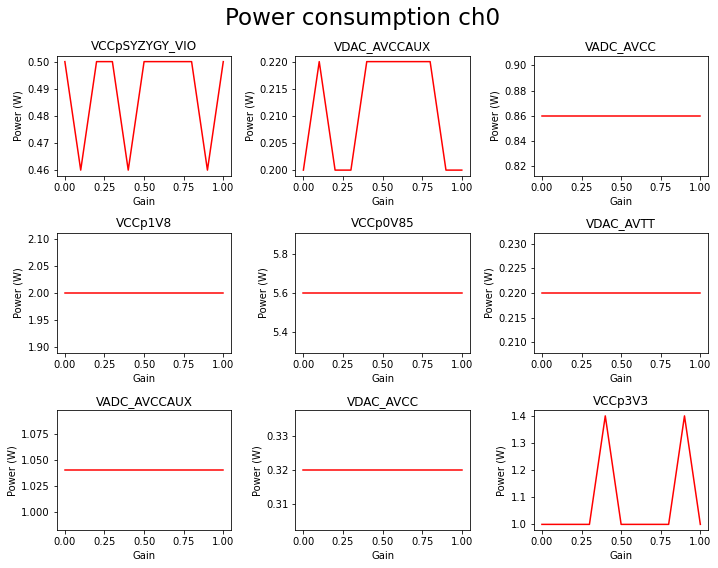

In [8]:
x=[d['Gain'] for d in power_list]
y_axes = [
    {'name':'VCCpSYZYGY_VIO', 'values': [d['VCCpSYZYGY_VIO'] for d in power_list] },
    {'name':'VDAC_AVCCAUX', 'values': [d['VDAC_AVCCAUX'] for d in power_list] },
    {'name': 'VADC_AVCC', 'values':[d['VADC_AVCC'] for d in power_list]},
    {'name': 'VCCp1V8', 'values':[d['VCCp1V8'] for d in power_list]},
    {'name': 'VCCp0V85', 'values':[d['VCCp0V85'] for d in power_list]},
    {'name': 'VDAC_AVTT', 'values':[d['VDAC_AVTT'] for d in power_list]},
    {'name': 'VADC_AVCCAUX', 'values':[d['VADC_AVCCAUX'] for d in power_list]},
    {'name': 'VDAC_AVCC', 'values':[d['VDAC_AVCC'] for d in power_list]},
    {'name': 'VCCp3V3', 'values':[d['VCCp3V3'] for d in power_list]}
]

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(10,8))
fig.suptitle('Power consumption ch0',fontsize=23)
for i in range(0,len(y_axes),1):
    ax[int(i/3),i-int(i/3)*3].plot(x, y_axes[i]['values'], 'r')
    ax[int(i/3),i-int(i/3)*3].set_xlabel('Gain')
    ax[int(i/3),i-int(i/3)*3].set_ylabel('Power (W)')
    ax[int(i/3),i-int(i/3)*3].set_title(y_axes[i]['name'])
plt.tight_layout()
fig.savefig("power_CH0.png")

## Power measurement channel 1

In [9]:
power_list = []
set_transmitter_channel(base.radio.transmitter.channel[0], False, 0, 1) #Deactivate channel 0
for i in np.linspace(0,10,11)/10:
    set_transmitter_channel(base.radio.transmitter.channel[1], True, i, 5000) #MHz
    time.sleep(3)
    power = {'Gain':i, 
           'VCCpSYZYGY_VIO': rails['VCCpSYZYGY_VIO'].power.value,
           'VDAC_AVCCAUX': rails['VDAC_AVCCAUX'].power.value,
           'VADC_AVCC': rails['VADC_AVCC'].power.value, 
           'VCCp1V8': rails['VCCp1V8'].power.value, 
           'VCCp0V85': rails['VCCp0V85'].power.value, 
           'VDAC_AVTT': rails['VDAC_AVTT'].power.value, 
           'VADC_AVCCAUX': rails['VADC_AVCCAUX'].power.value, 
           'VDAC_AVCC': rails['VDAC_AVCC'].power.value, 
           'VCCp3V3': rails['VCCp3V3'].power.value }
    power_list.append(power)

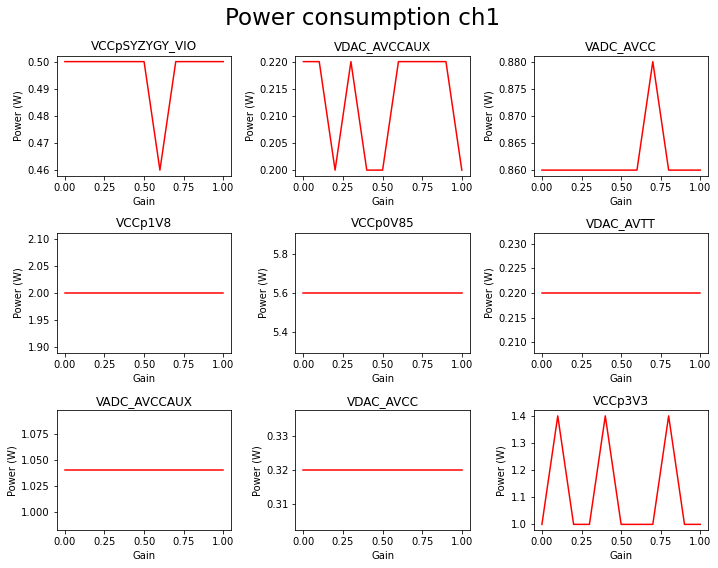

In [10]:
x=[d['Gain'] for d in power_list]
y_axes = [
    {'name':'VCCpSYZYGY_VIO', 'values': [d['VCCpSYZYGY_VIO'] for d in power_list] },
    {'name':'VDAC_AVCCAUX', 'values': [d['VDAC_AVCCAUX'] for d in power_list] },
    {'name': 'VADC_AVCC', 'values':[d['VADC_AVCC'] for d in power_list]},
    {'name': 'VCCp1V8', 'values':[d['VCCp1V8'] for d in power_list]},
    {'name': 'VCCp0V85', 'values':[d['VCCp0V85'] for d in power_list]},
    {'name': 'VDAC_AVTT', 'values':[d['VDAC_AVTT'] for d in power_list]},
    {'name': 'VADC_AVCCAUX', 'values':[d['VADC_AVCCAUX'] for d in power_list]},
    {'name': 'VDAC_AVCC', 'values':[d['VDAC_AVCC'] for d in power_list]},
    {'name': 'VCCp3V3', 'values':[d['VCCp3V3'] for d in power_list]}
]

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(10,8))
fig.suptitle('Power consumption ch1',fontsize=23)
for i in range(0,len(y_axes),1):
    ax[int(i/3),i-int(i/3)*3].plot(x, y_axes[i]['values'], 'r')
    ax[int(i/3),i-int(i/3)*3].set_xlabel('Gain')
    ax[int(i/3),i-int(i/3)*3].set_ylabel('Power (W)')
    ax[int(i/3),i-int(i/3)*3].set_title(y_axes[i]['name'])
plt.tight_layout()
fig.savefig("power_CH1.png")

## All channels enable, using power-down feature ##
---

## Power measurement channel 0, channel 1 powered-down ##
To power-down a channel, the entire tile must be powered-down. DAC channel 1 (RF-DAC A) is in tile 230 (Tile 2) and all ADC tiles enabled are also powered down as they are not in use (tiles 0 and 2).

In [11]:
# Power down ADC tiles
base.radio.rfdc.adc_tiles[0].ShutDown()
base.radio.rfdc.adc_tiles[2].ShutDown()

# Power down DAC tile
base.radio.rfdc.dac_tiles[2].ShutDown()
base.radio.rfdc.IPStatus

{'DACTileStatus': [{'IsEnabled': 1,
   'TileState': 15,
   'BlockStatusMask': 1,
   'PowerUpState': 1,
   'PLLState': 1},
  {'IsEnabled': 0,
   'TileState': 0,
   'BlockStatusMask': 0,
   'PowerUpState': 0,
   'PLLState': 0},
  {'IsEnabled': 1,
   'TileState': 1,
   'BlockStatusMask': 1,
   'PowerUpState': 0,
   'PLLState': 0},
  {'IsEnabled': 0,
   'TileState': 0,
   'BlockStatusMask': 0,
   'PowerUpState': 0,
   'PLLState': 0}],
 'ADCTileStatus': [{'IsEnabled': 1,
   'TileState': 1,
   'BlockStatusMask': 3,
   'PowerUpState': 0,
   'PLLState': 0},
  {'IsEnabled': 0,
   'TileState': 0,
   'BlockStatusMask': 0,
   'PowerUpState': 0,
   'PLLState': 0},
  {'IsEnabled': 1,
   'TileState': 1,
   'BlockStatusMask': 3,
   'PowerUpState': 0,
   'PLLState': 0},
  {'IsEnabled': 0,
   'TileState': 0,
   'BlockStatusMask': 0,
   'PowerUpState': 0,
   'PLLState': 0}],
 'State': 0}

In [12]:
power_list = []

for i in np.linspace(0,10,11)/10:
    set_transmitter_channel(base.radio.transmitter.channel[0], True, i, 5000) #MHz
    time.sleep(3)
    power = {'Gain':i, 
           'VCCpSYZYGY_VIO': rails['VCCpSYZYGY_VIO'].power.value,
           'VDAC_AVCCAUX': rails['VDAC_AVCCAUX'].power.value,
           'VADC_AVCC': rails['VADC_AVCC'].power.value, 
           'VCCp1V8': rails['VCCp1V8'].power.value, 
           'VCCp0V85': rails['VCCp0V85'].power.value, 
           'VDAC_AVTT': rails['VDAC_AVTT'].power.value, 
           'VADC_AVCCAUX': rails['VADC_AVCCAUX'].power.value, 
           'VDAC_AVCC': rails['VDAC_AVCC'].power.value, 
           'VCCp3V3': rails['VCCp3V3'].power.value }
    power_list.append(power)

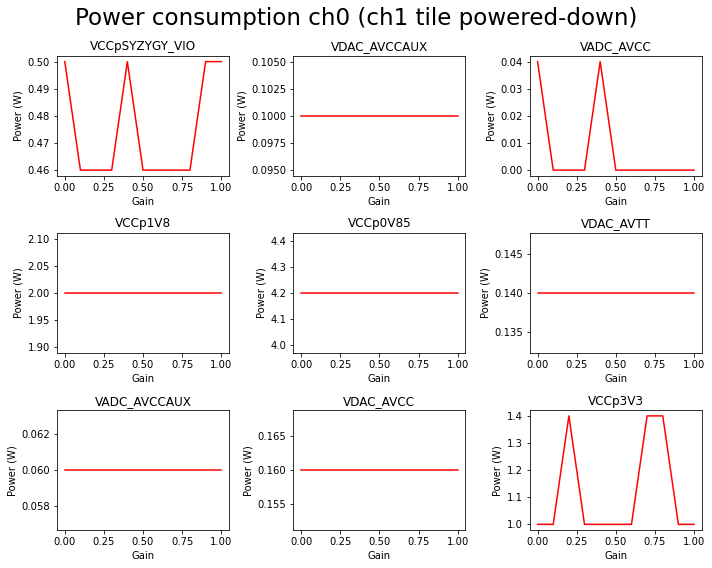

In [13]:
x=[d['Gain'] for d in power_list]
y_axes = [
    {'name':'VCCpSYZYGY_VIO', 'values': [d['VCCpSYZYGY_VIO'] for d in power_list] },
    {'name':'VDAC_AVCCAUX', 'values': [d['VDAC_AVCCAUX'] for d in power_list] },
    {'name': 'VADC_AVCC', 'values':[d['VADC_AVCC'] for d in power_list]},
    {'name': 'VCCp1V8', 'values':[d['VCCp1V8'] for d in power_list]},
    {'name': 'VCCp0V85', 'values':[d['VCCp0V85'] for d in power_list]},
    {'name': 'VDAC_AVTT', 'values':[d['VDAC_AVTT'] for d in power_list]},
    {'name': 'VADC_AVCCAUX', 'values':[d['VADC_AVCCAUX'] for d in power_list]},
    {'name': 'VDAC_AVCC', 'values':[d['VDAC_AVCC'] for d in power_list]},
    {'name': 'VCCp3V3', 'values':[d['VCCp3V3'] for d in power_list]}
]

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(10,8))
fig.suptitle('Power consumption ch0 (ch1 tile powered-down)',fontsize=23)
for i in range(0,len(y_axes),1):
    ax[int(i/3),i-int(i/3)*3].plot(x, y_axes[i]['values'], 'r')
    ax[int(i/3),i-int(i/3)*3].set_xlabel('Gain')
    ax[int(i/3),i-int(i/3)*3].set_ylabel('Power (W)')
    ax[int(i/3),i-int(i/3)*3].set_title(y_axes[i]['name'])
plt.tight_layout()
fig.savefig("power_CH0_disCH1.png")